In [1]:
from nltk.corpus import machado
from nltk.text import Text
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import nltk
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import re
import numpy as np
import wikipedia

In [20]:
def tolower(column_data):
    if not isinstance(column_data, str):
        return column_data
    lower_text= column_data.lower()

    return lower_text

def remove_accents(text):
  if isinstance(text, str):
    return unidecode(text)
  else:
    return text

def remove_special_char(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text

def remove_stopwords_spacy(all_sentences, model):
    if model == 'pt':
        model = spacy.load('pt_core_news_sm')
    else:
        model = spacy.load('en_core_web_sm')
        
    stopwords_spacy_pt = model.Defaults.stop_words
    
    for i in range(len(all_sentences)):
        all_sentences[i] = [word for word in all_sentences[i] if word not in stopwords_spacy_pt]
    
    return all_sentences

def tokenizer(text):

  if not isinstance(text, str):
    return text

  sentences = nltk.sent_tokenize(text)

  all_sentences = []
  for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    all_sentences.append(words)

  return all_sentences

### Exercício 1

In [21]:
mis_mut = wikipedia.page("Missense mutation")
mis_mut.content

'In genetics, a missense mutation is a point mutation in which a single nucleotide change results in a codon that codes for a different amino acid. It is a type of nonsynonymous substitution. Missense mutations change amino acids, which in turn alter proteins and may alter a protein\'s function or structure. These mutations may arise spontaneously from mutagens like UV radiation, tobacco smoke, an error in DNA replication, and other factors. Screening for missense mutations can be done by sequencing the genome of an organism and comparing the sequence to a reference genome to analyze for differences. Missense mutations can be repaired by the cell when there are errors in DNA replication by using mechanisms such as DNA proofreading and mismatch repair. They can also be repaired by using genetic engineering technologies or pharmaceuticals. Some notable examples of human diseases caused by missense mutations are Rett syndrome, cystic fibrosis, and sickle-cell disease.\n\n\n== Impact on Pr

In [22]:
process_I = remove_special_char(mis_mut.content)
process_II = tolower(process_I)
process_III = remove_accents(process_II)
process_IV = tokenizer(process_III)
process_V = remove_stopwords_spacy(process_IV, 'en')

In [23]:
Counter(process_V[0]).most_common(10)

[('mutations', 39),
 ('missense', 36),
 ('dna', 33),
 ('protein', 25),
 ('mutation', 23),
 ('amino', 16),
 ('acid', 15),
 ('sequencing', 15),
 ('cell', 13),
 ('base', 11)]

In [24]:
word_counts = Counter(process_V[0])

min_freq = min(word_counts.values())

least_common_words = [word for word, count in word_counts.items() if count == min_freq]

len(least_common_words)

417

### Exercicio 2

In [35]:
nltk.download('machado')

[nltk_data] Downloading package machado to /home/grati/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [33]:
with open('marm01.txt', 'r', encoding='latin-1') as f:
    ressurreicao = f.read()

print(ressurreicao[:100])

ROMANCE, Ressurreição,1872

Ressurreição

Texto-fonte:
Obra Completa, Machado de Assis,
Rio de Janei


In [39]:
with open('macr02.txt', 'r', encoding='latin-1') as f:
    dr_semana = f.read()

print(dr_semana[:100])

CRÔNICA. Cronicas do Dr. Semana, 1861

Crônicas do Dr. Semana

Texto-fonte:

Obra Completa, Machado 


In [30]:
with open('macn002.txt', 'r', encoding='latin-1') as f:
    hist_meia_noite = f.read()

print(hist_meia_noite[:100])

Conto, Historias da Meia-Noite, 1873

    Histórias da Meia-Noite

    Texto-fonte:
    Obra Complet


Frequência absoluta de POS por gênero:
       conto  romance  cronica
ADJ     1861     1165     2065
ADP     4457     3379     5200
ADV     2838     1067     3036
AUX     1223      566     1390
CCONJ   1496      810     1607
DET     4531     2211     5100
INTJ      68       16       90
NOUN    7693     4779     8608
NUM      208      106      402
PRON    2925     1067     3102
PROPN   1354     1152     1902
SCONJ   1442      741     1720
VERB    5266     2303     5899
X          2        2        2


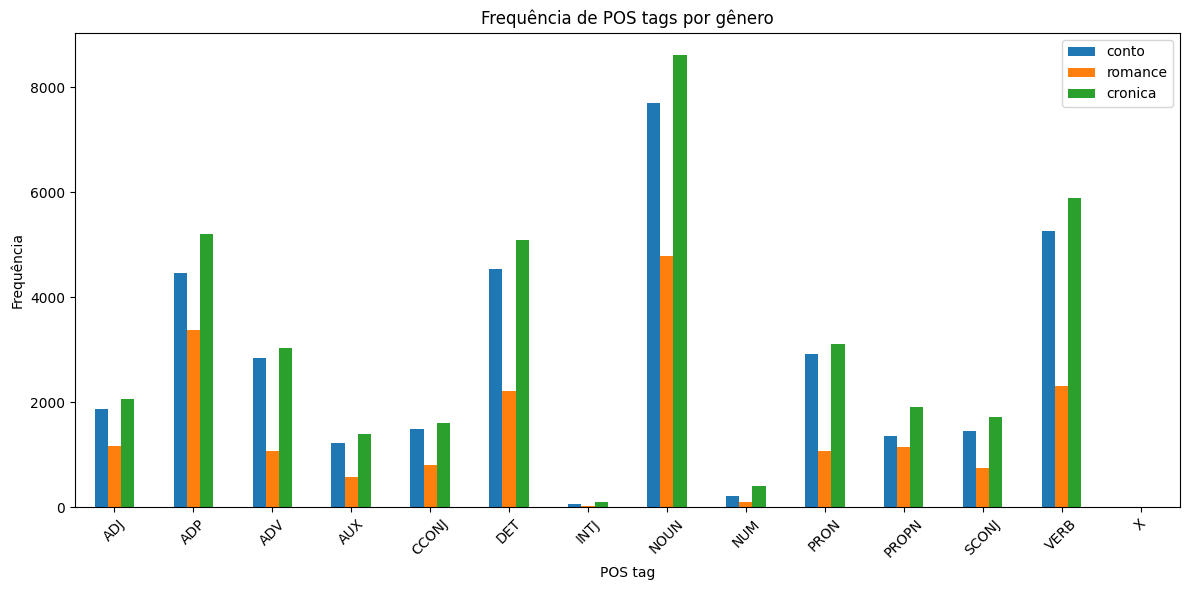

In [40]:
# Carrega modelo de português
nlp = spacy.load("pt_core_news_sm")

# Dicionário com os textos e seus gêneros
textos = {
    'conto': ressurreicao,
    'romance': dr_semana,
    'cronica': hist_meia_noite
}

# Armazena contagens de POS
pos_freqs = {}

for genero, texto in textos.items():
    doc = nlp(texto)
    pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
    pos_freqs[genero] = pos_counts

# Junta em DataFrame
df = pd.DataFrame(pos_freqs).fillna(0).astype(int)
df = df.sort_index()

# Tabela comparativa
print("Frequência absoluta de POS por gênero:")
print(df)

# Gráfico comparativo
df.plot(kind='bar', figsize=(12, 6), title='Frequência de POS tags por gênero')
plt.xlabel('POS tag')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
### Exercicio 3

### Exercicio 3

In [3]:
with open('maps01.txt', 'r', encoding='latin-1') as f:
    poesia = f.read()

print(poesia[:100])

Poesia, Crisálidas, 1864

Crisálidas

Texto-fonte:

Obra Completa, Machado de Assis, vol. II,

Nova



In [6]:
process_I = tolower(poesia)
process_II = remove_accents(process_I)
process_III = remove_special_char(process_II)
process_IV = tokenizer(process_III) 
process_V = remove_stopwords_spacy(process_IV)

In [7]:
freq = Counter(process_V[0])
mais_comuns = freq.most_common()
mais_comuns[1:10]

[('amor', 79),
 ('alma', 61),
 ('vida', 44),
 ('olhos', 39),
 ('luz', 37),
 ('gloria', 32),
 ('terra', 31),
 ('tao', 30),
 ('flor', 29)]

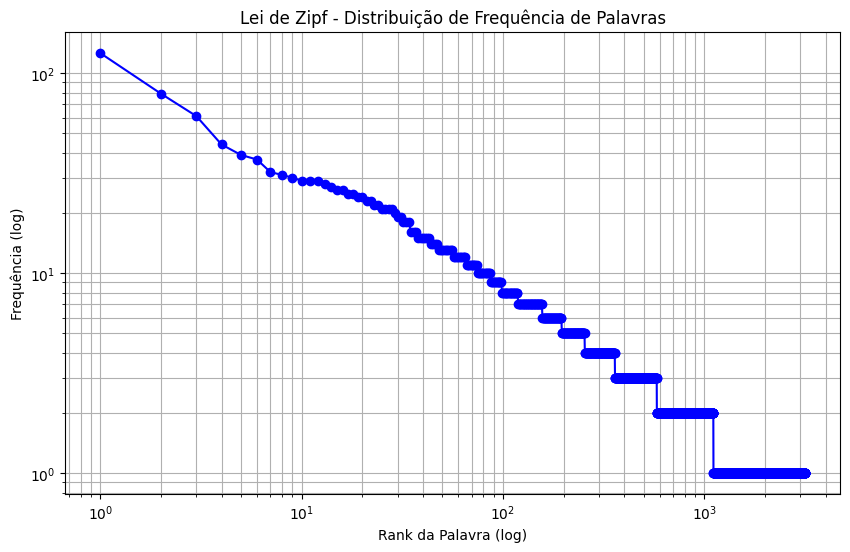

In [8]:
# Extrair ranks e frequências
ranks = np.arange(1, len(mais_comuns)+1)
frequencias = np.array([freq for _, freq in mais_comuns])

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencias, 'b-', marker='o')
plt.title('Lei de Zipf - Distribuição de Frequência de Palavras')
plt.xlabel('Rank da Palavra (log)')
plt.ylabel('Frequência (log)')
plt.grid(True, which="both", ls="-")
plt.show()